In [1]:
import numpy as np
import plotly.graph_objects as go
import h5py
import matplotlib.pyplot as plt

In [34]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (10, 8)

In [3]:
box_sizes = np.arange(5, 36, 5)

data = h5py.File('../data/photos.hdf5')

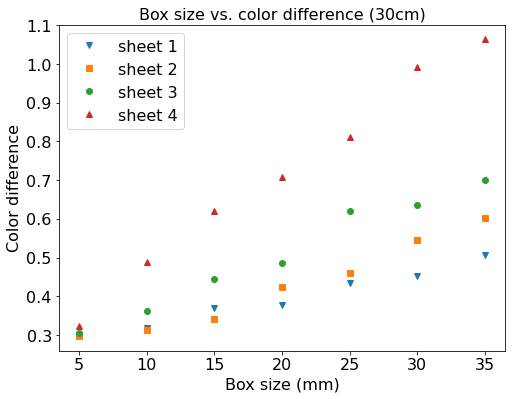

In [15]:
box_distance = '30cm'

plt.plot(box_sizes, data[box_distance]['1']['tow_camera']['blur'][:], label='sheet 1', linestyle='None', marker='v')
plt.plot(box_sizes, data[box_distance]['2']['tow_camera']['blur'][:], label='sheet 2', linestyle='None', marker='s')
plt.plot(box_sizes, data[box_distance]['3']['tow_camera']['blur'][:], label='sheet 3', linestyle='None', marker='o')
plt.plot(box_sizes, data[box_distance]['4']['tow_camera']['blur'][:], label='sheet 4', linestyle='None', marker='^')

plt.legend()


plt.xlabel('Box size (mm)')
plt.ylabel('Color difference')
plt.title('Box size vs. color difference ({})'.format(box_distance))
plt.savefig('box_color_difference_{}.png'.format(box_distance))

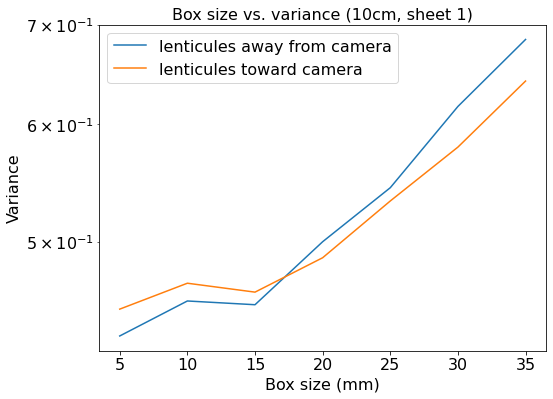

In [29]:
box_distance = '10cm'
sheet = '1'

plt.plot(box_sizes, data[box_distance][sheet]['away_camera']['blur'][:], label='lenticules away from camera')
plt.plot(box_sizes, data[box_distance][sheet]['tow_camera']['blur'][:], label='lenticules toward camera')

plt.legend()

# plt.yscale('log')

plt.xlabel('Box size (mm)')
plt.ylabel('Variance')
plt.title('Box size vs. variance ({}, sheet {})'.format(box_distance, sheet))
plt.savefig('box_variance_{}.png'.format(box_distance))

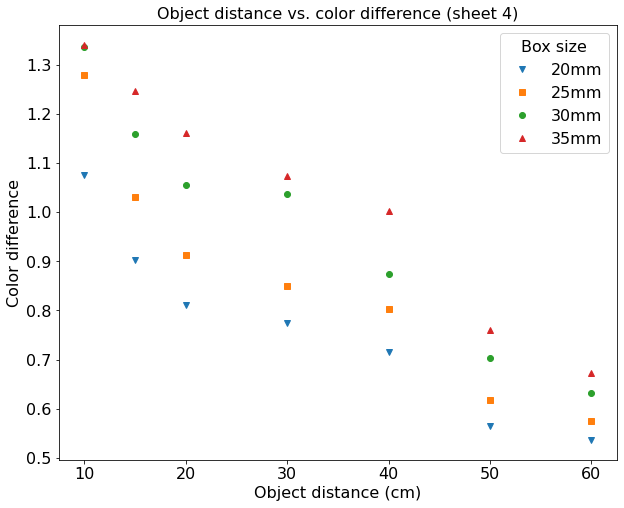

In [35]:
sheets = ['1', '2', '3', '4']
box_ds = [3, 4, 5, 6]
box_distances = [10, 15, 20, 30, 40, 50, 60]

box_d_variance = {}

for sheet in sheets:
    box_d_variance[sheet] = {}

    for box_d in box_ds:
        box_d_variance[sheet][box_d] = np.zeros(len(box_distances))
        for i, box_distance in enumerate(box_distances):
            box_d_variance[sheet][box_d][i] = data['{}cm'.format(box_distance)][sheet]['away_camera']['blur'][box_d]

# plt.plot(box_distances, box_d_variance['1'], label='sheet 1', marker='v')
# plt.plot(box_distances, box_d_variance['2'], label='sheet 2', marker='s')
# plt.plot(box_distances, box_d_variance['3'], label='sheet 3', marker='o')

plt.plot(box_distances, box_d_variance['4'][3], label='20mm', marker='v', linestyle='None')
plt.plot(box_distances, box_d_variance['4'][4], label='25mm', marker='s', linestyle='None')
plt.plot(box_distances, box_d_variance['4'][5], label='30mm', marker='o', linestyle='None')
plt.plot(box_distances, box_d_variance['4'][6], label='35mm', marker='^', linestyle='None')

plt.legend(title='Box size')
# plt.yscale('log')

plt.xlabel('Object distance (cm)')
plt.ylabel('Color difference')
plt.title('Object distance vs. color difference (sheet 4)')
plt.savefig('obj_d_color_diff_sheet_4.png')

In [39]:
data.close()